In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
# 1. Baca dataset dan parsing kolom Date_Joined sebagai datetime
df = pd.read_csv('Unicorn.csv', parse_dates=['Date_Joined'])
df

,Unnamed: 0,Company,Valuation_In_Billions,Date_Joined,Country,City,Industry,Investor_1,Investor_2,Investor_3,Investor_4
0,0,Bytedance,140.0,2017-04-07,China,Beijing,Artificial intelligence,Sequoia Capital China,SIG Asia Investments,Sina Weibo,Softbank Group
1,1,SpaceX,100.3,2012-12-01,United States,Hawthorne,Other,Founders Fund,Draper Fisher Jurvetson,Rothenberg Ventures,NaN
2,2,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,Khosla Ventures,LowercaseCapital,capitalG,NaN
3,3,Klarna,45.6,2011-12-12,Sweden,Stockholm,Fintech,Institutional Venture Partners,Sequoia Capital,General Atlantic,NaN
4,4,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet software & services,Sequoia Capital China,Blackbird Ventures,Matrix Partners,NaN
...,...,...,...,...,...,...,...,...,...,...,...
931,931,YipitData,1.0,2021-12-06,United States,New York,Internet software & services,RRE Ventures+,Highland Capital Partners,The Carlyle Group,NaN
932,932,Anyscale,1.0,2021-12-07,United States,Berkeley,Artificial intelligence,Andreessen Horowitz,Intel Capital,Foundation Capital,NaN
933,933,Iodine Software,1.0,2021-12-01,United States,Austin,Data management & analytics,Advent International,Bain Capital Ventures,Silversmith Capital Partners,NaN
934,934,ReliaQuest,1.0,2021-12-01,United States,Tampa,Cybersecurity,KKR,FTV Capital,Ten Eleven Ventures,NaN


In [26]:
# Menampilkan informasi dasar
print("Dimensi awal dataset:", df.shape)

Dimensi awal dataset: (936, 11)


In [27]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             936 non-null    int64         
 1   Company                936 non-null    object        
 2   Valuation_In_Billions  936 non-null    float64       
 3   Date_Joined            936 non-null    datetime64[ns]
 4   Country                936 non-null    object        
 5   City                   936 non-null    object        
 6   Industry               936 non-null    object        
 7   Investor_1             936 non-null    object        
 8   Investor_2             890 non-null    object        
 9   Investor_3             806 non-null    object        
 10  Investor_4             7 non-null      object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(8)
memory usage: 80.6+ KB


,Unnamed: 0,Valuation_In_Billions
count,936.000000,936.000000
mean,467.500000,3.281154
std,270.344225,7.473179
min,0.000000,1.000000
25%,233.750000,1.050000
50%,467.500000,1.600000
75%,701.250000,3.000000
max,935.000000,140.000000


In [28]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head(5)

,Company,Valuation_In_Billions,Date_Joined,Country,City,Industry,Investor_1,Investor_2,Investor_3,Investor_4
0,Bytedance,140.0,2017-04-07,China,Beijing,Artificial intelligence,Sequoia Capital China,SIG Asia Investments,Sina Weibo,Softbank Group
1,SpaceX,100.3,2012-12-01,United States,Hawthorne,Other,Founders Fund,Draper Fisher Jurvetson,Rothenberg Ventures,NaN
2,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,Khosla Ventures,LowercaseCapital,capitalG,NaN
3,Klarna,45.6,2011-12-12,Sweden,Stockholm,Fintech,Institutional Venture Partners,Sequoia Capital,General Atlantic,NaN
4,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet software & services,Sequoia Capital China,Blackbird Ventures,Matrix Partners,NaN


In [29]:
# print("=== Data Sebelum Cleaning ===")

# # Deteksi data duplikat
# duplicate_count = df.duplicated().sum()
# print("Jumlah data duplikat:", duplicate_count)

# # Deteksi missing values
# missing_values = df.isnull().sum()
# print("Missing values per kolom:\n", missing_values)

# # Deteksi outlier pada kolom Valuation_In_Billions menggunakan metode IQR
# def detect_outliers(data, column):
#     Q1 = data[column].quantile(0.25)
#     Q3 = data[column].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
#     return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# outliers = detect_outliers(df, 'Valuation_In_Billions')
# print("Jumlah outlier pada Valuation_In_Billions:", outliers.shape[0])

# # Visualisasi histogram dan box plot sebelum cleaning
# plt.figure(figsize=(12,5))
# plt.subplot(1,2,1)
# sns.histplot(df['Valuation_In_Billions'], kde=True, color='skyblue')
# plt.title("Histogram Valuation (Sebelum Cleaning)")

# plt.subplot(1,2,2)
# sns.boxplot(x=df['Valuation_In_Billions'], color='lightgreen')
# plt.title("Boxplot Valuation (Sebelum Cleaning)")
# plt.tight_layout()
# plt.show()

In [30]:
# # --- Data Cleaning ---
# # Hapus duplikat
# df_clean = df.drop_duplicates()

# # Hapus missing values
# df_clean = df_clean.dropna()

# # Hapus outlier pada Valuation_In_Billions
# Q1 = df_clean['Valuation_In_Billions'].quantile(0.25)
# Q3 = df_clean['Valuation_In_Billions'].quantile(0.75)
# IQR = Q3 - Q1
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR
# df_clean = df_clean[(df_clean['Valuation_In_Billions'] >= lower_bound) & 
#                     (df_clean['Valuation_In_Billions'] <= upper_bound)]

# print("\n=== Data Setelah Cleaning ===")
# print("Shape:", df_clean.shape)
# print(df_clean.head())

# # Visualisasi histogram dan box plot setelah cleaning
# plt.figure(figsize=(12,5))
# plt.subplot(1,2,1)
# sns.histplot(df_clean['Valuation_In_Billions'], kde=True, color='skyblue')
# plt.title("Histogram Valuation (Setelah Cleaning)")

# plt.subplot(1,2,2)
# sns.boxplot(x=df_clean['Valuation_In_Billions'], color='lightgreen')
# plt.title("Boxplot Valuation (Setelah Cleaning)")
# plt.tight_layout()
# plt.show()

In [31]:
# # Simpan dataset yang telah dibersihkan
# df_clean.to_csv('Unicorn.csv', index=False)

In [32]:
# Pastikan dataset yang digunakan adalah dataset yang telah dibersihkan
df_vis = pd.read_csv('Unicorn.csv', parse_dates=['Date_Joined'])

# Total Company (Count distinct)
total_companies = df_vis['Company'].nunique()
print("Total Companies:", total_companies)

# Total City (Count distinct)
total_cities = df_vis['City'].nunique()
print("Total Cities:", total_cities)

# Total Country (Count distinct)
total_countries = df_vis['Country'].nunique()
print("Total Countries:", total_countries)

# Highest Business Valuation
highest_valuation = df_vis['Valuation_In_Billions'].max()
print("Highest Valuation (in billions):", highest_valuation)

Total Companies: 935
Total Cities: 241
Total Countries: 45
Highest Valuation (in billions): 140.0


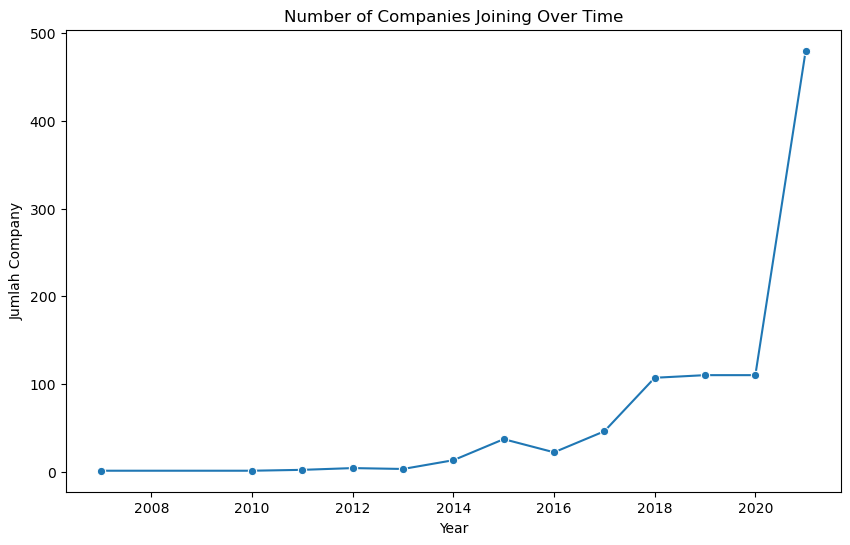

In [33]:
# Grafik Time Series: Number of Companies Joining Over Time
df_vis['Year_Joined'] = df_vis['Date_Joined'].dt.year
companies_by_year = df_vis.groupby('Year_Joined')['Company'].count().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(data=companies_by_year, x='Year_Joined', y='Company', marker='o')
plt.title("Number of Companies Joining Over Time")
plt.xlabel("Year")
plt.ylabel("Jumlah Company")
plt.show()

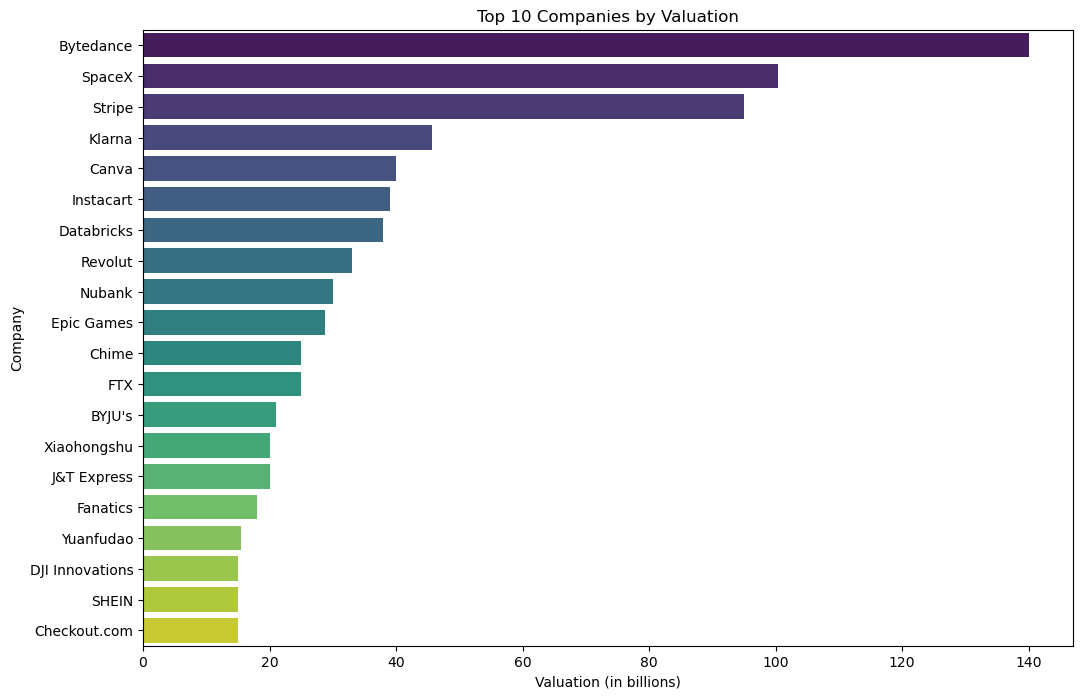

In [34]:
# Horizontal Bar Chart: Top 10 Company by Valuation
top10 = df_vis.nlargest(20, 'Valuation_In_Billions')
plt.figure(figsize=(12,8))
sns.barplot(x='Valuation_In_Billions', y='Company', data=top10, palette="viridis")
plt.title("Top 10 Companies by Valuation")
plt.xlabel("Valuation (in billions)")
plt.ylabel("Company")
plt.show()

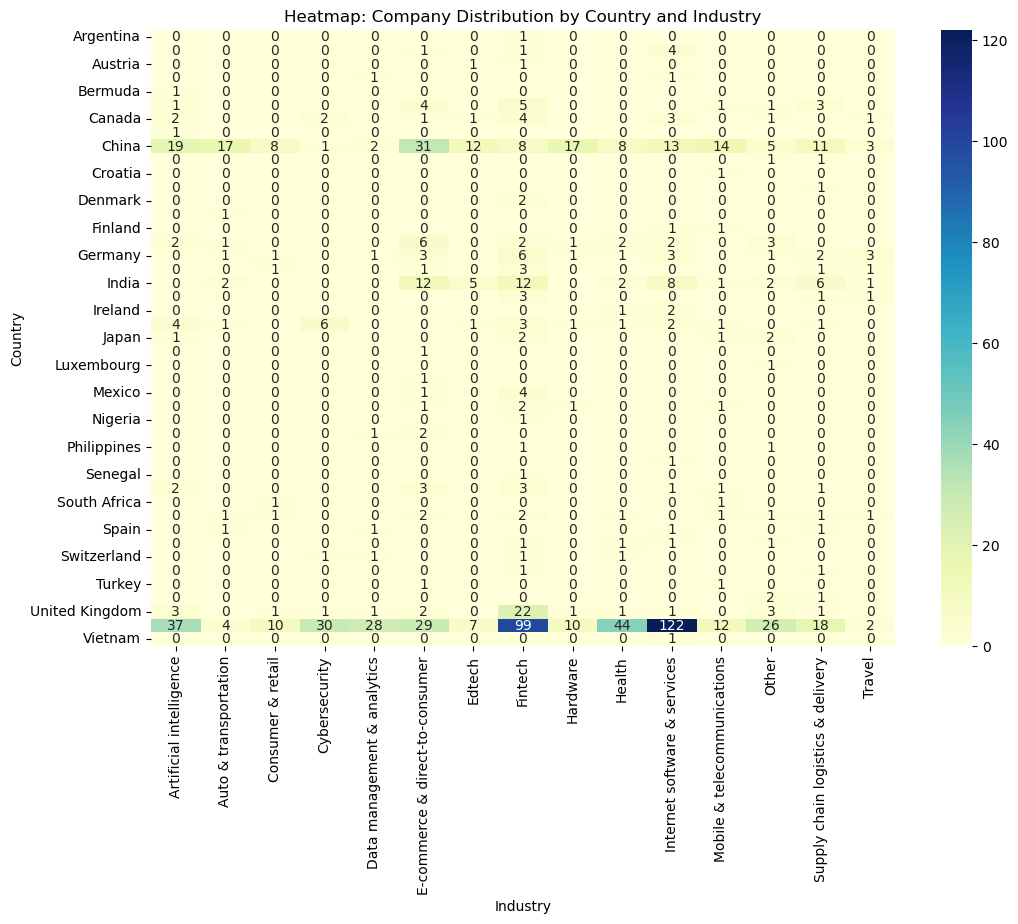

In [35]:
# # Heatmap: Distribution & Intensity of Company Based on Country dan Industry
# # (Pivot table dengan Country sebagai baris dan Industry sebagai kolom)
# country_industry = df_vis.pivot_table(index='Country', columns='Industry', aggfunc='size', fill_value=0)
# plt.figure(figsize=(12,8))
# sns.heatmap(country_industry, annot=True, fmt='d', cmap='YlGnBu')
# plt.title("Heatmap: Company Distribution by Country and Industry")
# plt.show()

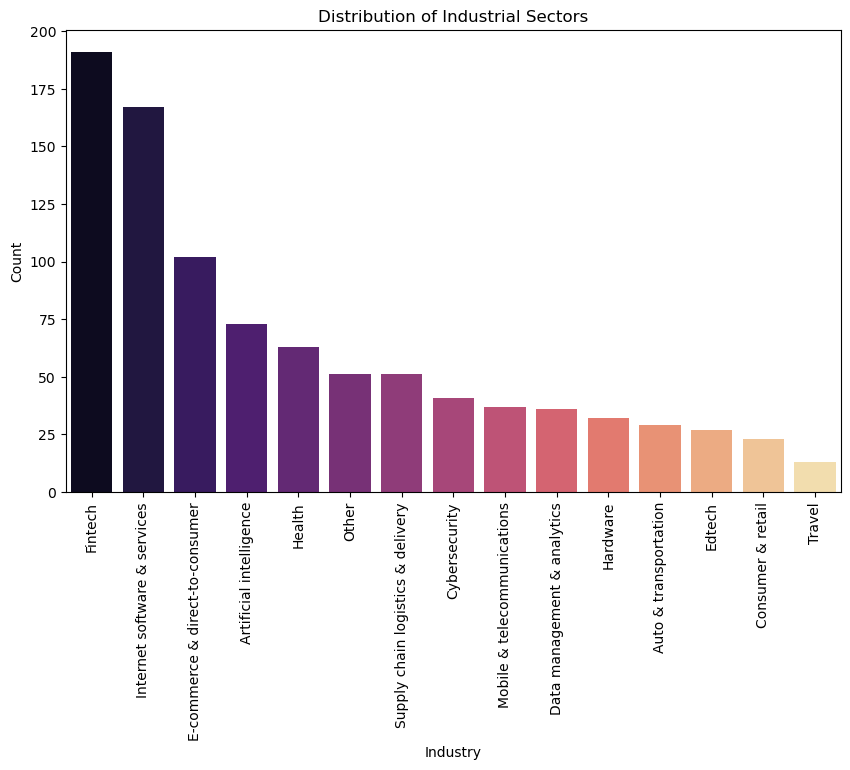

In [40]:
# Bar Chart: Industrial Sectors Distribution & Percentage
industry_counts = df_vis['Industry'].value_counts().reset_index()
industry_counts.columns = ['Industry', 'Count']
industry_counts['Percentage'] = (industry_counts['Count'] / industry_counts['Count'].sum()) * 100

plt.figure(figsize=(10,6))
ax = sns.barplot(x='Industry', y='Count', data=industry_counts, palette="magma")
plt.title("Distribution of Industrial Sectors")
plt.xlabel("Industry")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

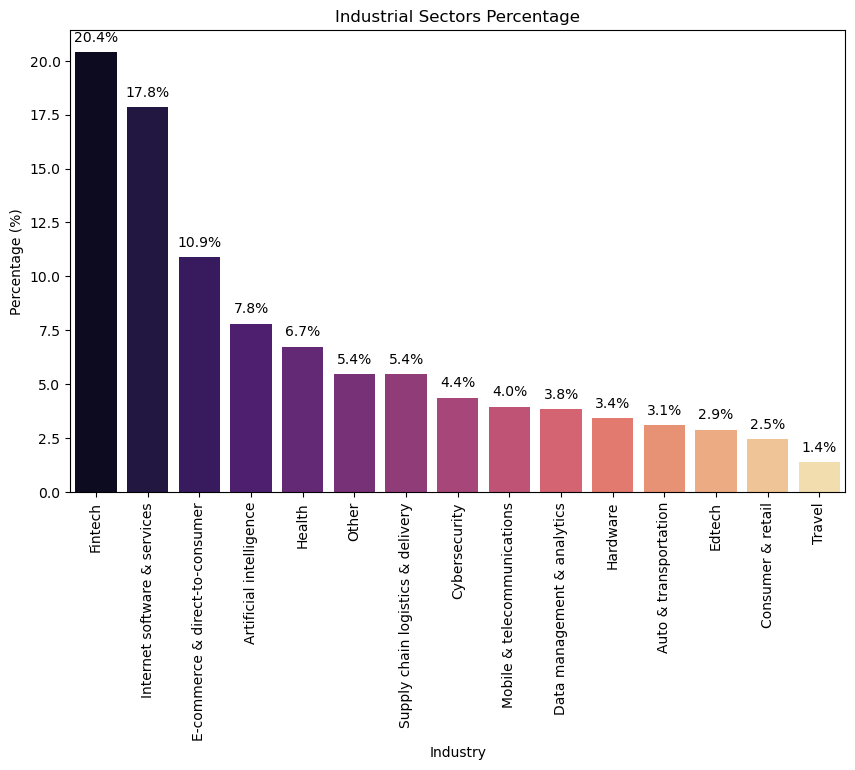

In [41]:
# Menampilkan persentase pada bar chart
plt.figure(figsize=(10,6))
ax = sns.barplot(x='Industry', y='Percentage', data=industry_counts, palette="magma")
plt.title("Industrial Sectors Percentage")
plt.xlabel("Industry")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=90)
for i, row in industry_counts.iterrows():
    ax.text(i, row.Percentage + 0.5, f"{row.Percentage:.1f}%", color='black', ha="center")
plt.show()

In [38]:
# import streamlit as st
# # Membaca dataset yang sudah dibersihkan
# df = pd.read_csv('Unicorn_cleaned.csv', parse_dates=['Date_Joined'])
# df['Year_Joined'] = df['Date_Joined'].dt.year

# st.title("Dashboard Unicorn Companies")

# st.header("Data Overview")
# st.markdown(f"**Total Companies:** {df['Company'].nunique()}")
# st.markdown(f"**Total Cities:** {df['City'].nunique()}")
# st.markdown(f"**Total Countries:** {df['Country'].nunique()}")
# st.markdown(f"**Highest Valuation (in billions):** {df['Valuation_In_Billions'].max()}")

# st.header("Companies Joining Over Time")
# companies_by_year = df.groupby('Year_Joined')['Company'].count().reset_index()
# fig, ax = plt.subplots()
# sns.lineplot(data=companies_by_year, x='Year_Joined', y='Company', marker='o', ax=ax)
# ax.set_title("Number of Companies Joining Over Time")
# ax.set_xlabel("Year")
# ax.set_ylabel("Jumlah Company")
# st.pyplot(fig)

# st.header("Top 10 Companies by Valuation")
# top10 = df.nlargest(10, 'Valuation_In_Billions')
# fig, ax = plt.subplots()
# sns.barplot(x='Valuation_In_Billions', y='Company', data=top10, palette="viridis", ax=ax)
# ax.set_title("Top 10 Companies by Valuation")
# st.pyplot(fig)

# st.header("Distribution by Country & Industry")
# country_industry = df.pivot_table(index='Country', columns='Industry', aggfunc='size', fill_value=0)
# fig, ax = plt.subplots(figsize=(12,8))
# sns.heatmap(country_industry, annot=True, fmt='d', cmap='YlGnBu', ax=ax)
# ax.set_title("Company Distribution by Country and Industry")
# st.pyplot(fig)

# st.header("Industrial Sectors Distribution")
# industry_counts = df['Industry'].value_counts().reset_index()
# industry_counts.columns = ['Industry', 'Count']
# fig, ax = plt.subplots()
# sns.barplot(x='Industry', y='Count', data=industry_counts, palette="magma", ax=ax)
# ax.set_title("Distribution of Industrial Sectors")
# plt.xticks(rotation=45)
# st.pyplot(fig)
